## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

In [1]:
import pandas as pd
accidents = pd.read_csv(r'./data/accident-data.csv')
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,...,5,0,0,0,4,1,1,0,0,1


In [2]:
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
lookup.head()

,table,field name,code/format,label,note
0,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,accident_year,NaN,NaN,NaN
2,Accident,accident_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,longitude,NaN,NaN,Null if not known
4,Accident,Latitude,NaN,NaN,Null if not known


## configure params

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('axes.formatter', useoffset=False)
sns.set(rc={'figure.figsize':(11,6)})
sns.set_theme(style="whitegrid")

# Các tiêu chí cần phải có khi phân tích time series

Đây là data đc phân loại theo thứ (day of week - DoW) của 1 year. Do đó, tập trung vào phân tích tính tuần hoàn của DoW đc đề cao

In [4]:
new_accidents = accidents.copy(deep=True)
new_accidents['day_of_week'].replace({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'}, inplace=True)
new_accidents['urban_or_rural_area'].replace({1:'Urban', 2:'Rural', 3:'other', -1:'other'}, inplace=True)

In [5]:
new_accidents

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,Tue,...,6,0,9,9,1,9,9,0,0,Urban
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,Mon,...,6,0,0,4,1,1,1,0,0,Urban
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,Wed,...,6,0,0,0,4,1,2,0,0,Urban
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,Wed,...,6,0,0,4,4,1,1,0,0,Urban
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,Wed,...,5,0,0,0,4,1,1,0,0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,-2.926320,56.473539,2,2,1,12/08/2020,Wed,...,4,959,0,0,1,1,1,0,0,Urban
91195,2020991029573,2020,991029573,-4.267565,55.802353,3,1,1,13/11/2020,Fri,...,6,0,0,0,1,1,1,0,0,Urban
91196,2020991030297,2020,991030297,-2.271903,57.186317,2,2,1,15/04/2020,Wed,...,6,0,0,0,1,1,1,0,0,Rural
91197,2020991030900,2020,991030900,-3.968753,55.950940,3,2,1,15/12/2020,Tue,...,6,0,0,0,1,1,1,0,0,Urban


### Đã là DoW thì plot đầu tiên luôn luôn phải có là plot ***bar graph of volume per day***

In [6]:
from plot_graphs import plot_bar_volume

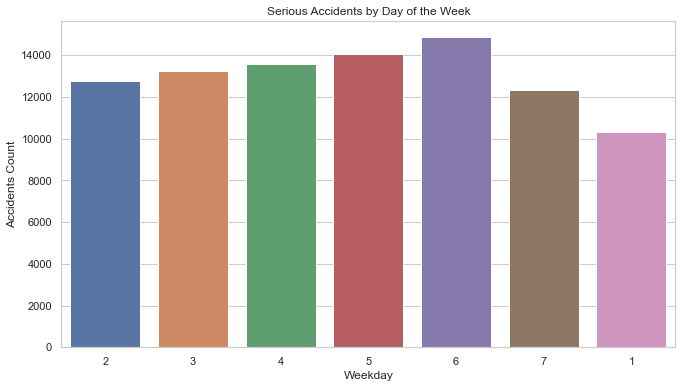

In [7]:
plot_bar_volume(accidents, 'day_of_week', order_list=[2,3,4,5,6,7,1],x_label='Weekday', y_label='Accidents Count', title='Serious Accidents by Day of the Week')

The second categories is to plot the each type of target analysis by day of week.

In this example, accident severity and rural/urban should be plot
Usually, These target analysis never > 4 (if so, cluster them so that they == 4)

In [8]:
from plot_graphs import plot_grid_bar_day_of_week

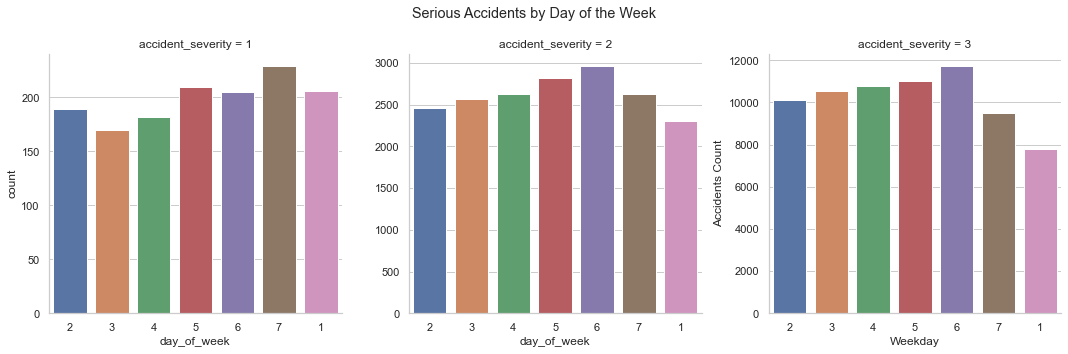

In [9]:
# sns.catplot(x='day_of_week', data=accidents, kind="count", col='accident_severity', sharey=False)
plot_grid_bar_day_of_week(accidents, 'day_of_week', 'accident_severity', order_list=[2,3,4,5,6,7,1], x_label='Weekday', y_label='Accidents Count', title='Serious Accidents by Day of the Week')

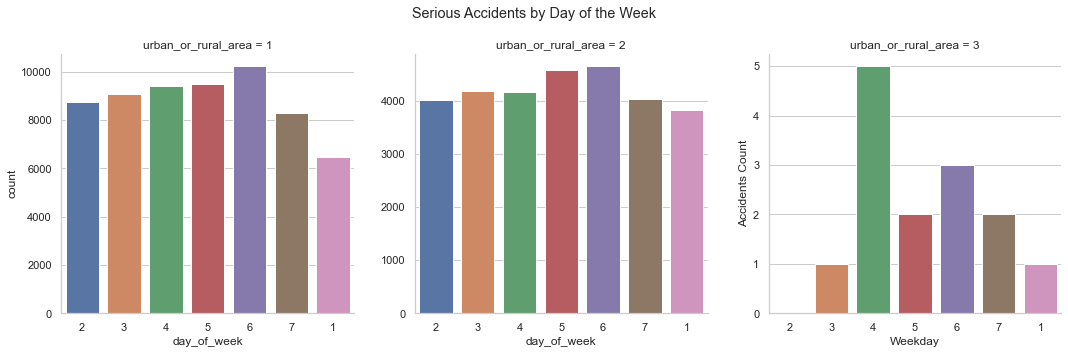

In [10]:
plot_grid_bar_day_of_week(accidents, 'day_of_week', 'urban_or_rural_area', order_list=[2,3,4,5,6,7,1], x_label='Weekday', y_label='Accidents Count', title='Serious Accidents by Day of the Week')


In [11]:
from randomness_test import test_runs_randomness

In [12]:
test_runs_randomness(accidents.day_of_week)

'Alpha is 0.0, data points are not random'

Random test shown that the test data by day_of_week is not due to randomness, therefore there are such day of week exert dominance of accidents

### Ngoài day of week, dataset còn cung cấp cho ta time. Ở frame day, time đc phân chia thành morning, afternoon, night để dễ phân loại

- Night (from 12 am to 5.59 am)
- Morning (from 6 am to 11.59 am)
- Afternoon (from 12 pm to 5.59 pm)
- Evening (from 6 pm to 11.59 pm)

In [13]:
from datetime import datetime
new_accidents['time'] = new_accidents['time'].apply(lambda x: datetime.strptime(x, '%H:%M'))

# Extract hour and minutes from the datetime
new_accidents['hour'] = new_accidents['time'].dt.time

In [14]:
from data_transformation import group_time_to_noon

In [15]:
new_accidents = group_time_to_noon(new_accidents, 'time')

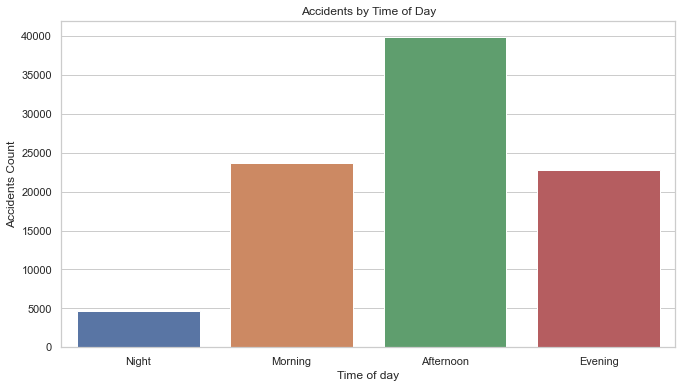

In [16]:
plot_bar_volume(new_accidents, 'timebin', order_list=['Night', 'Morning', 'Afternoon', 'Evening'],x_label='Time of day', y_label='Accidents Count', title='Accidents by Time of Day')

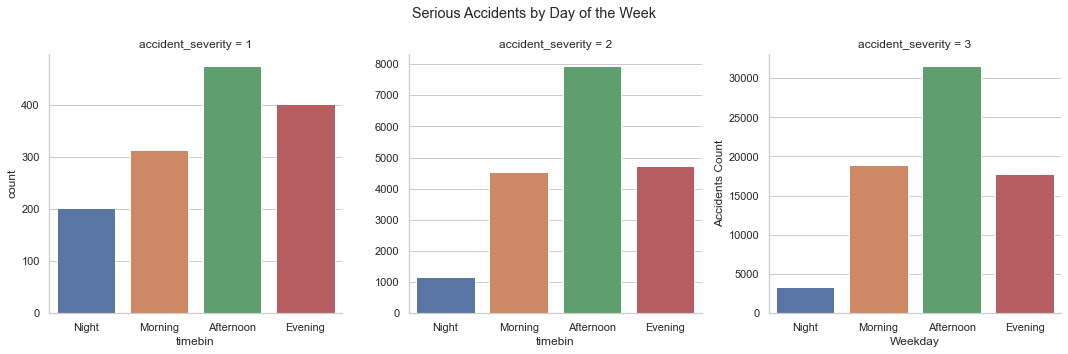

In [17]:
plot_grid_bar_day_of_week(new_accidents, 'timebin', 'accident_severity', order_list=['Night', 'Morning', 'Afternoon', 'Evening'], x_label='Weekday', y_label='Accidents Count', title='Serious Accidents by Day of the Week')

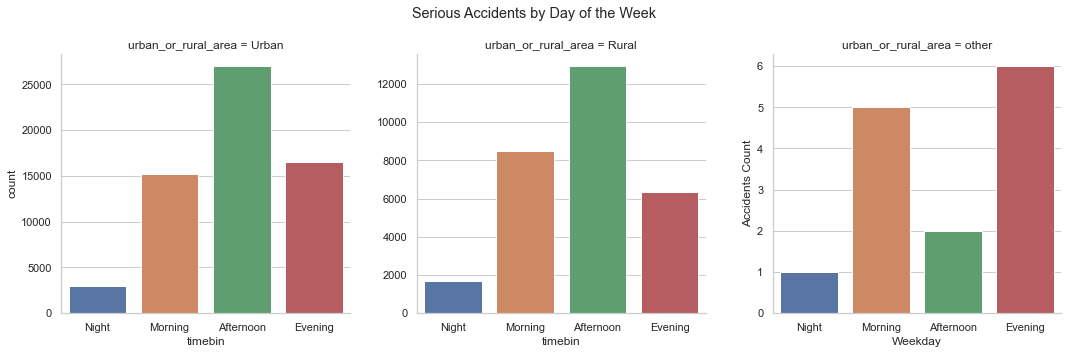

In [18]:
plot_grid_bar_day_of_week(new_accidents, 'timebin', 'urban_or_rural_area', order_list=['Night', 'Morning', 'Afternoon', 'Evening'], x_label='Weekday', y_label='Accidents Count', title='Serious Accidents by Day of the Week')

### After plot by Noons, we continue to narrow the plot criteria -> plot by each hour

In [19]:
from data_transformation import group_time_to_hour

In [20]:
new_accidents = group_time_to_hour(new_accidents, 'time')
new_accidents

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,hour,timebin,bin_hours
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,Tue,...,9,1,9,9,0,0,Urban,09:00:00,Morning,"[9, 10)"
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,Mon,...,4,1,1,1,0,0,Urban,13:55:00,Afternoon,"[13, 14)"
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,Wed,...,0,4,1,2,0,0,Urban,01:25:00,Night,"[1, 2)"
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,Wed,...,4,4,1,1,0,0,Urban,01:50:00,Night,"[1, 2)"
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,Wed,...,0,4,1,1,0,0,Urban,02:25:00,Night,"[2, 3)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,-2.926320,56.473539,2,2,1,12/08/2020,Wed,...,0,1,1,1,0,0,Urban,14:30:00,Afternoon,"[14, 15)"
91195,2020991029573,2020,991029573,-4.267565,55.802353,3,1,1,13/11/2020,Fri,...,0,1,1,1,0,0,Urban,15:05:00,Afternoon,"[15, 16)"
91196,2020991030297,2020,991030297,-2.271903,57.186317,2,2,1,15/04/2020,Wed,...,0,1,1,1,0,0,Rural,12:42:00,Afternoon,"[12, 13)"
91197,2020991030900,2020,991030900,-3.968753,55.950940,3,2,1,15/12/2020,Tue,...,0,1,1,1,0,0,Urban,14:00:00,Afternoon,"[14, 15)"


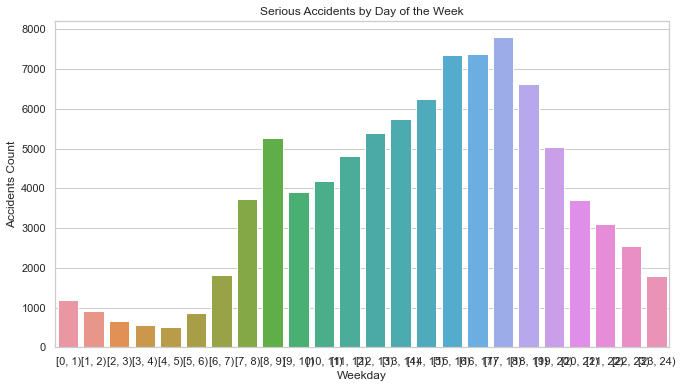

In [21]:
plot_bar_volume(new_accidents, 'bin_hours', x_label='Weekday', y_label='Accidents Count', title='Serious Accidents by Day of the Week')

The data is relatively left skew, with most accidents falls in starts at 15:00 and end at 18:00 (Afternoon indeed) 

### Plot weekdays against weekend

In [22]:
from data_transformation import split_df_to_weekend

In [23]:
weekdays, weekend = split_df_to_weekend(new_accidents, 'day_of_week', ['Sat', 'Sun'])

In [24]:
len(weekend) / len(new_accidents)

0.24836895141394094

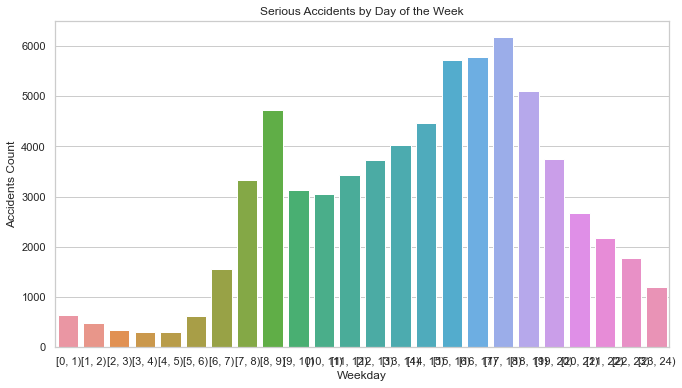

In [25]:
plot_bar_volume(weekdays, 'bin_hours', x_label='Weekday', y_label='Accidents Count', title='Serious Accidents by Day of the Week')

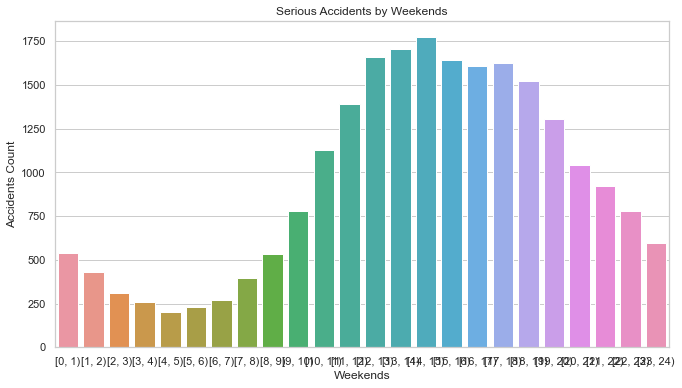

In [26]:
plot_bar_volume(weekend, 'bin_hours', x_label='Weekends', y_label='Accidents Count', title='Serious Accidents by Weekends')


### Plot against month

In [27]:
from data_transformation import group_date_to_month

In [28]:
new_accidents = group_date_to_month(new_accidents, 'date')

c:\Users\LETPC\.virtualenvs\data_science--pQqXRHO\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/04/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\LETPC\.virtualenvs\data_science--pQqXRHO\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\LETPC\.virtualenvs\data_science--pQqXRHO\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\LETPC\.virtualenvs\data_science--pQqXRHO\lib\site-packages\pandas\core\tools

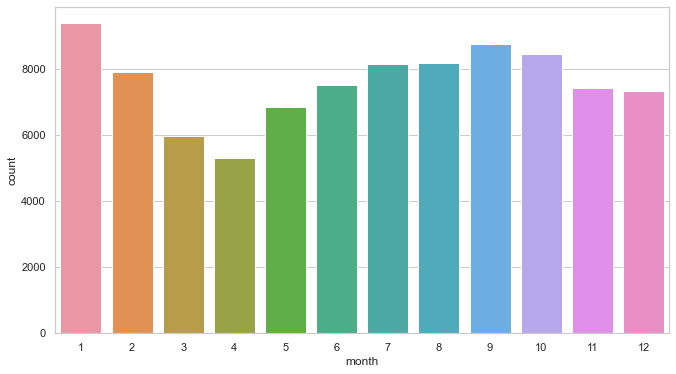

In [29]:
plot_bar_volume(new_accidents, 'month')

### Intensity calendar

We would plot each time of day to make an intensity map of a whole year. 

In [30]:
from plot_graphs import plot_heatmap_calender

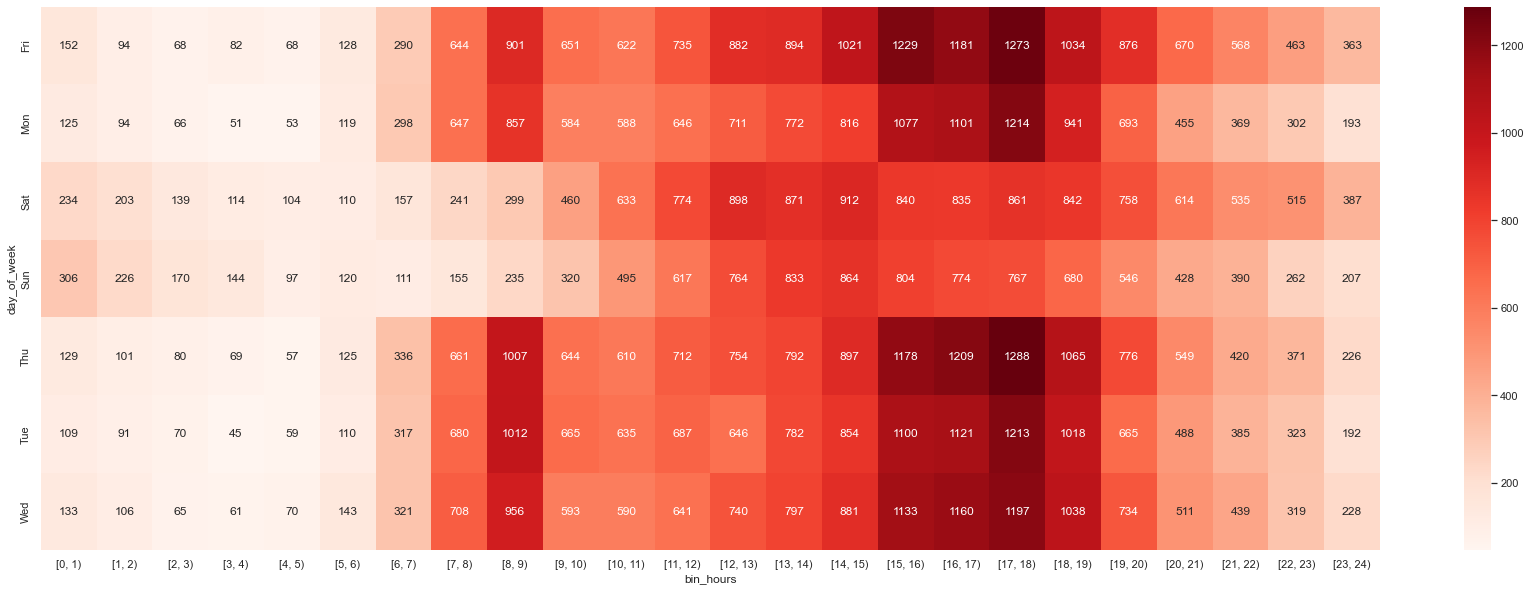

In [31]:

plot_heatmap_calender(new_accidents, 'day_of_week', 'bin_hours', cmap = "Reds", annot = True)

### Plot graph by length of day

https://www.worlddata.info/europe/united-kingdom/sunset.php

From the link above, we can see that night time start differently accross UK. That is why in the afternoon, variance between daytime and nighttime between each month is big. That is why, we should split the dataframe base on night or day to make sure if they are day or night

In [32]:
# night_start_dictionary

### Grid plot by features

In [33]:
import numpy as np
new_accidents['speed_limit'] = new_accidents['speed_limit'].replace(99, np.nan)
new_accidents['junction_detail'] = new_accidents['junction_detail'].replace(99, np.nan)
 
new_accidents['road_type'] = new_accidents['road_type'].replace(9, np.nan)
new_accidents['pedestrian_crossing_human_control'] = new_accidents['pedestrian_crossing_human_control'].replace(9, np.nan)
new_accidents['pedestrian_crossing_physical_facilities'] = new_accidents['pedestrian_crossing_physical_facilities'].replace(9, np.nan)
new_accidents['weather_conditions'] = new_accidents['weather_conditions'].replace(9, np.nan)
new_accidents['road_surface_conditions'] = new_accidents['road_surface_conditions'].replace(9, np.nan)
new_accidents['special_conditions_at_site'] = new_accidents['special_conditions_at_site'].replace(9, np.nan)
new_accidents['carriageway_hazards'] = new_accidents['carriageway_hazards'].replace(9, np.nan)

# Remove junction control column
new_accidents = new_accidents.drop('junction_control', axis = 1)
                           
# Remove null values
new_accidents = new_accidents.dropna()

In [34]:
serious = (new_accidents['number_of_casualties'] >= 3)
new_accidents['serious'] = np.where(serious, 'Yes', 'No')

In [35]:
col_to_plot = ['speed_limit', 'junction_detail', 'road_type', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards']

In [36]:
from plot_graphs import plot_features_grid

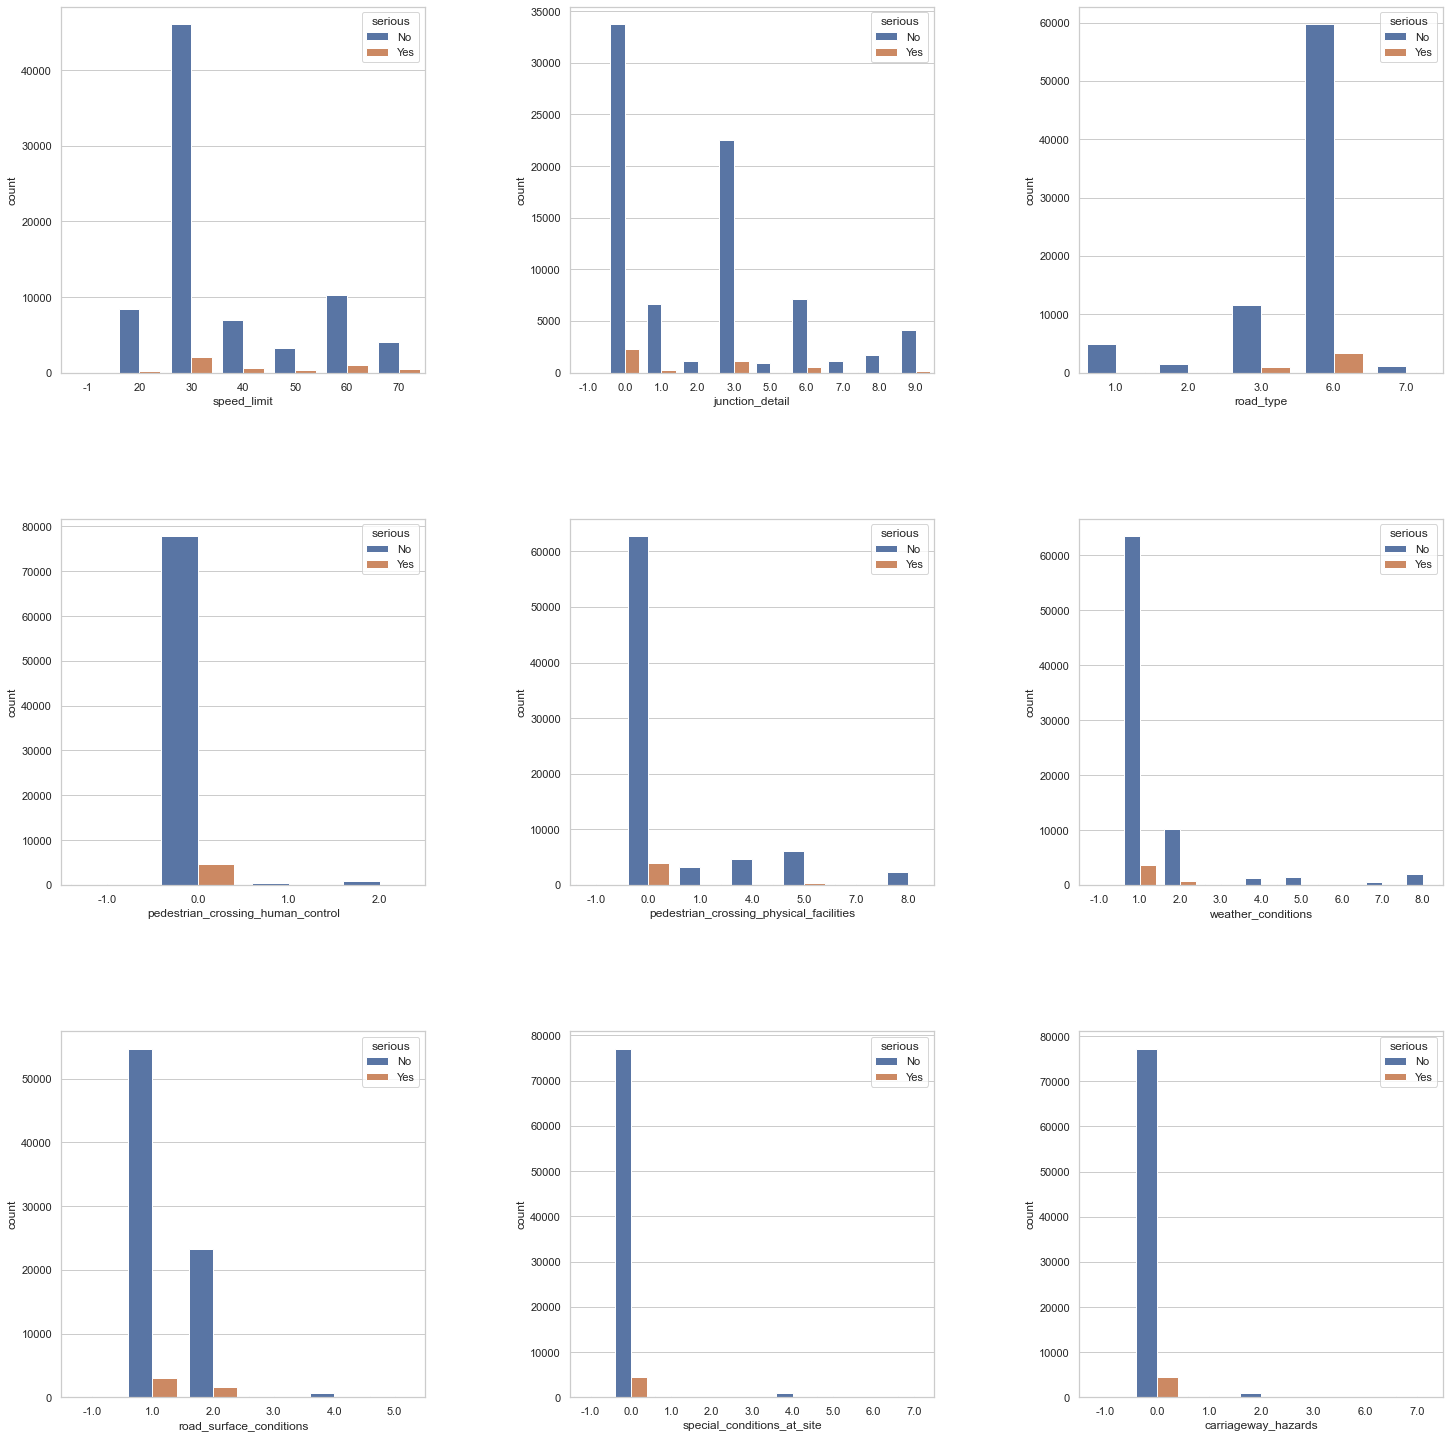

In [37]:
plot_features_grid(new_accidents, col_to_plot, hue='serious')

Ta có thể thấy, do most non-serious accidents chiếm rất nhiều, do đó, ta xài percent

In [38]:
from plot_graphs import plot_percent_features_grid

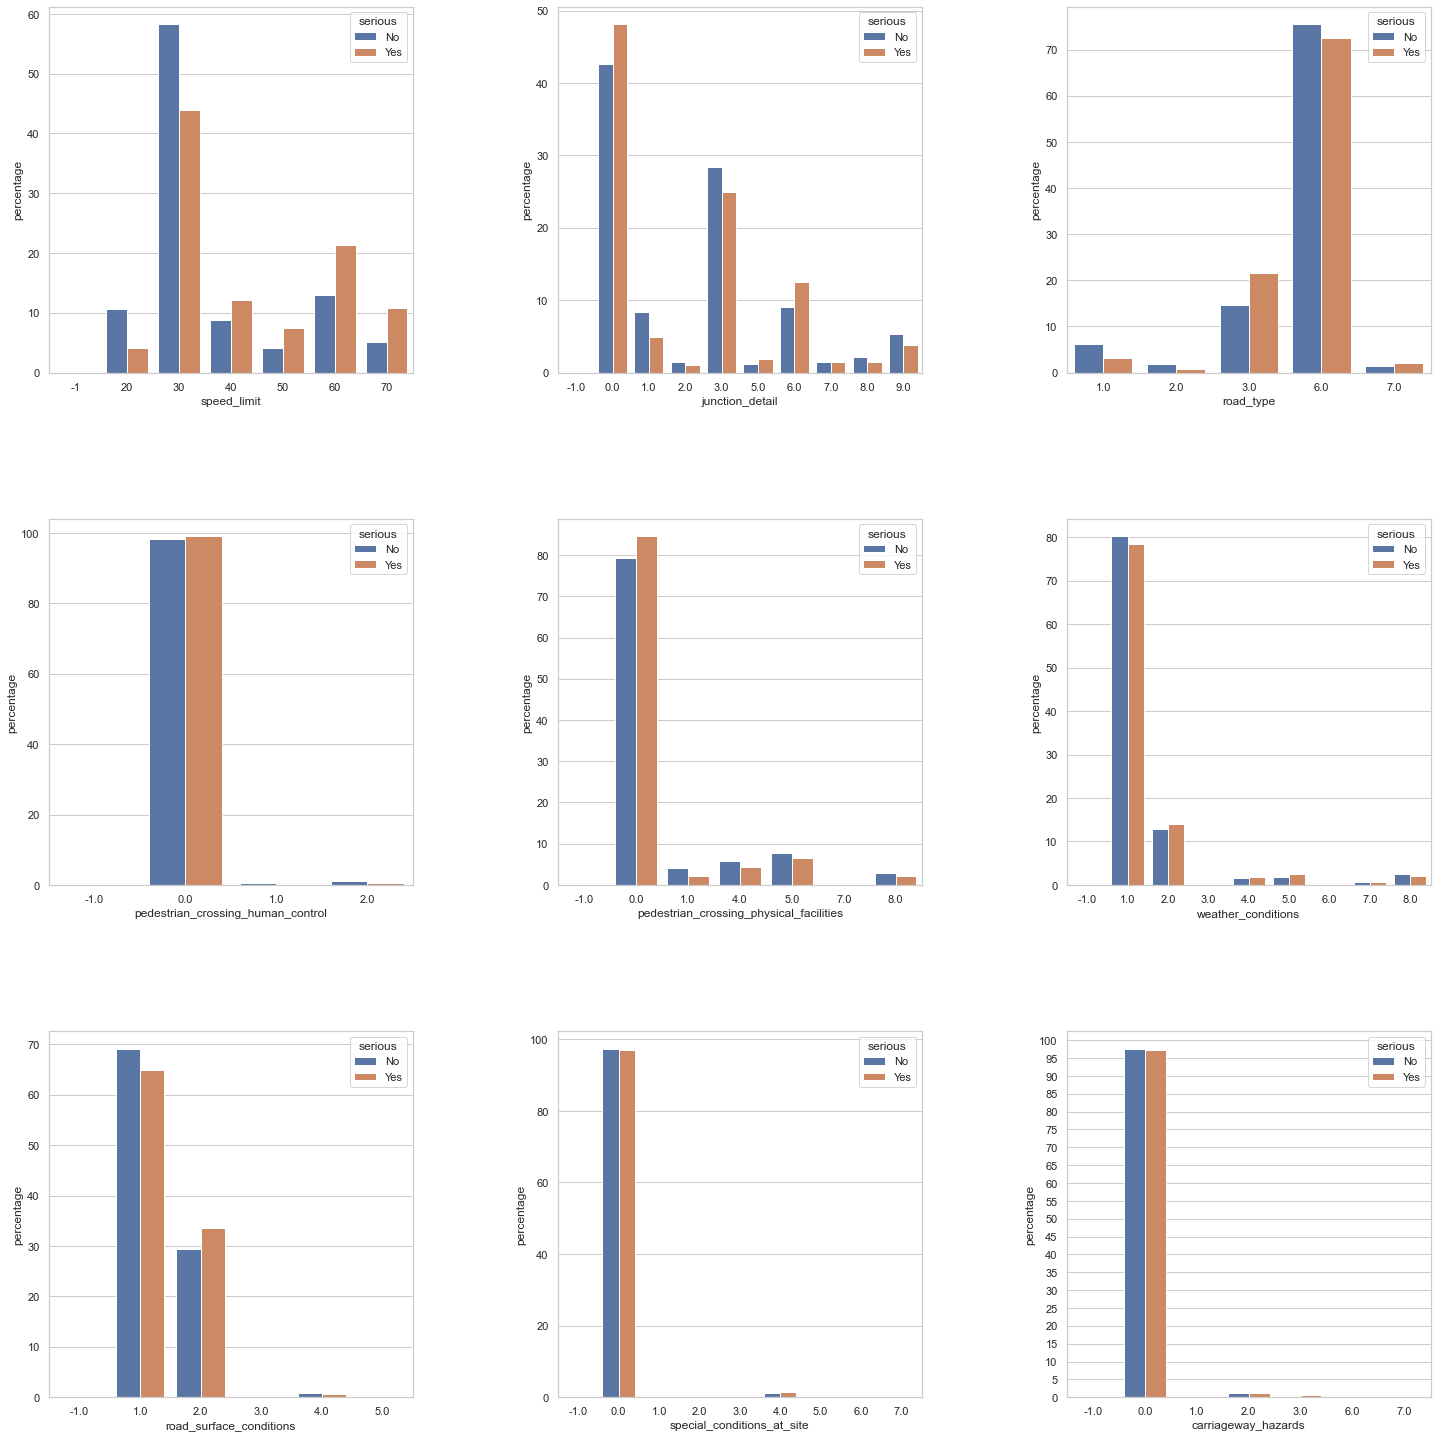

In [40]:
plot_percent_features_grid(new_accidents, col_to_plot, hue='serious')

In [41]:
from plot_graphs import plot_on_map

In [42]:
serious = new_accidents.loc[new_accidents['number_of_casualties'] >= 3]

plot_on_map(serious, hue='speed_limit', size='number_of_casualties')